In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [2]:
#Загружаем  датасет (ОЧИЩЕННЫЙ ОТ ВЫБРОСОВ)
df = pd.read_excel(r"C:\Users\55944\Desktop\888\data_iqr_2.xlsx")

In [3]:
df.shape

(922, 14)

In [4]:
#Удаляем первый неинформативный столбец
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [5]:
#from sklearn.preprocessing import MinMaxScaler по колонкам

#x = df.values
#min_max_scaler = MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pd.DataFrame(x_scaled)

In [6]:
#df

In [7]:
#Нормализуем данные с помощью MinMaxScaler() по колонкам 
##ol =df.columns
#result = scaler.fit_transform(df)

#data_iqr_2_minmax_n = pd.DataFrame(result, columns = col)
#data_iqr_2_minmax_n.describe()

In [8]:
#data_iqr_2_minmax_n

In [9]:
#разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные
#x_train, x_test, y_train, y_test = train_test_split(
  # data_iqr_2_minmax_n.loc[:, df.columns != 'Модуль упругости при растяжении, ГПа'],
   # data_iqr_2_minmax_n[['Модуль упругости при растяжении, ГПа']],
 #      test_size = 0.3,
#    random_state = 42)

In [10]:
#x_train.head()

In [11]:
#y_train.head()

In [12]:
# Проверка правильности разбивки
#data_iqr_2_minmax_n.shape[0] - x_train.shape[0] - x_test.shape[0]

In [13]:
scaler = MinMaxScaler()
scaler.fit(df.drop('Модуль упругости при растяжении, ГПа', axis=1))
scaled_features = scaler.transform(df.drop('Модуль упругости при растяжении, ГПа', axis=1))

In [14]:
scaled_data = pd.DataFrame(scaled_features, columns =df.drop('Модуль упругости при растяжении, ГПа', axis=1).columns)

In [15]:
 #отберем признаки и поместим их в переменную X
x=scaled_data
 #целевую переменную поместим в переменную y
y = df['Модуль упругости при растяжении, ГПа']


In [16]:
# разобьем данные на обучающую и тестовую выборку
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                   random_state = 42)

In [17]:
# Проверка правильности разбивки
scaled_data.shape[0] - x_train.shape[0] - x_test.shape[0]

0

In [18]:
x_train.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
481,0.266219,0.643037,0.278232,0.234584,0.439240,0.321655,0.495611,0.578683,0.623998,1.0,0.571430,0.433990
650,0.178334,0.586130,0.463191,0.348338,0.616075,0.320131,0.204285,0.479890,0.391352,1.0,0.317517,0.537455
483,0.297796,0.532890,0.354250,0.758052,0.625457,0.716345,0.348479,0.569650,0.237919,1.0,0.554280,0.619605
355,0.590224,0.605695,0.692900,0.360136,0.654481,0.389632,0.456376,0.641999,0.392215,0.0,0.474980,0.306469
850,0.258455,0.170680,0.502517,0.470569,0.576124,0.477262,0.229392,0.436179,0.682036,1.0,0.623942,0.429910


In [19]:
y_train.head()

481    69.573625
650    80.691499
483    71.887367
355    68.314525
850    72.997468
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [20]:
#Метод опорных векторов-1
svr =  SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0)
#обучаем модель
svr.fit(x_train, np.ravel(y_train))
#вычисляем коэффициент детерминации
y_pred_svr = svr.predict(x_test)
mae_svr = mean_absolute_error(y_pred_svr, y_test)
mse_svr_elast = mean_squared_error(y_test,y_pred_svr)
R_Squared_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression Results Train:') 
print("Train score: {:.2f}".format(svr.score(x_train, y_train))) 
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test, y_pred_svr)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_svr)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast)))
print ('R Squared =',r2_score(y_test, y_pred_svr))
print("Test score: {:.2f}".format(svr.score(x_test, y_test))) 

Support Vector Regression Results Train:
Train score: 0.89
Support Vector Regression Results:
SVR_MAE: 4
SVR_MAPE: 0.05
SVR_MSE: 20.47
SVR_RMSE: 4.52
R Squared = -1.0655312358552633
Test score: -1.07


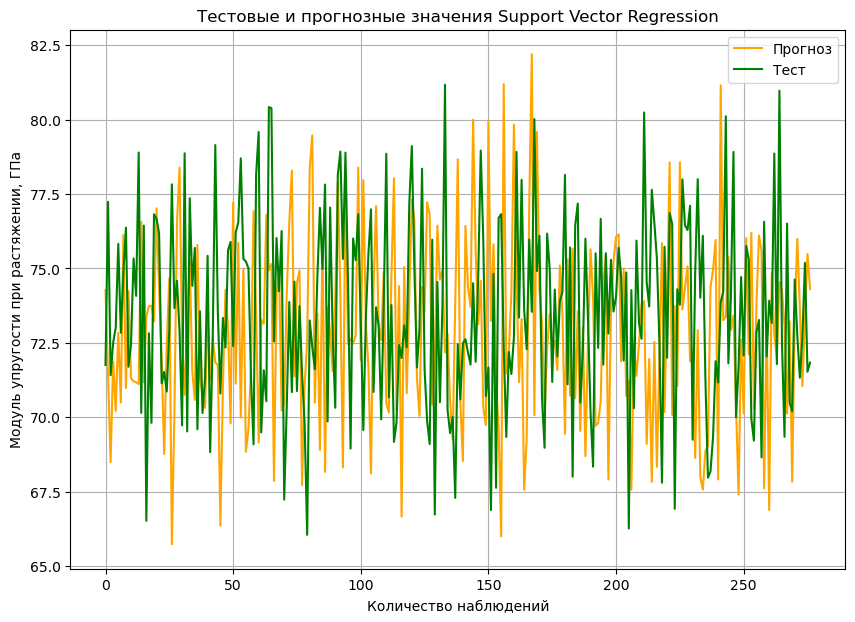

In [21]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr, label = "Прогноз", color = "orange")
plt.plot(y_test.values, label = "Тест", color = "green")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [22]:
#построение модели и вузуализация метода случайный лес-2
rfr = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr.fit(x_train, y_train.values)
y_pred_rfr = rfr.predict(x_test)
mae_rfr = mean_absolute_error(y_pred_rfr, y_test)
mse_rfr_elast = mean_squared_error(y_test,y_pred_rfr)
R_Squared_rfr =r2_score(y_test, y_pred_rfr)
print('Random Forest Regressor Results Train:')
print("Train score: {:.2f}".format(rfr.score(x_train, y_train))) # Скор для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test, y_pred_rfr)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_rfr)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast)))
print ('R Squared =',r2_score(y_test, y_pred_rfr))
print("Test score: {:.2f}".format(rfr.score(x_test, y_test))) # Скор для тестовой выборки

Random Forest Regressor Results Train:
Train score: 0.38
Random Forest Regressor Results:
RF_MAE:  3
RF_MAPE: 0.04
RF_MSE: 10.50
RF_RMSE: 3.24
R Squared = -0.05976832228355233
Test score: -0.06


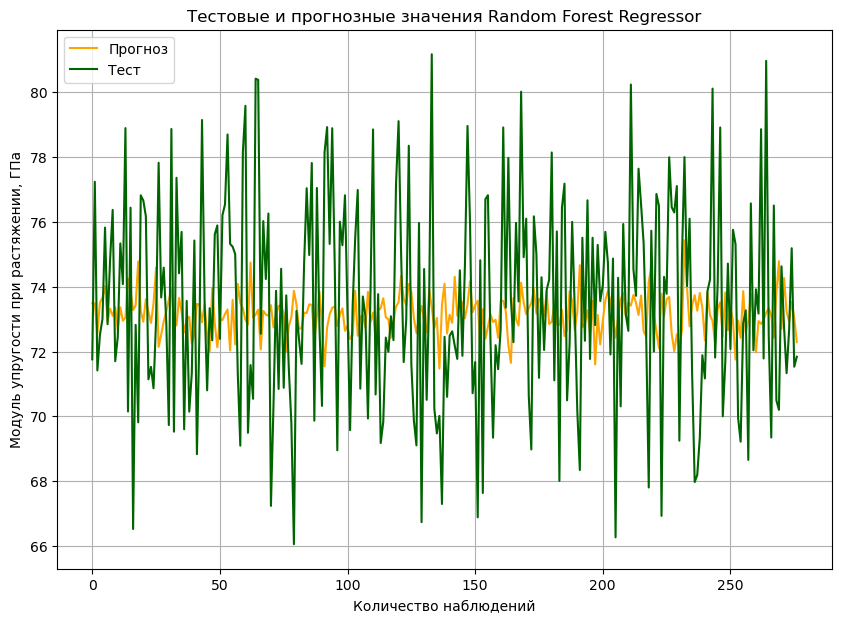

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_rfr, label = "Прогноз", color = "orange")
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [24]:
#построение модели и вузуализация Линейной регрессии-3
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
mae_lr = mean_absolute_error(y_pred_lr, y_test)
mse_lin_elast = mean_squared_error(y_test, y_pred_lr)
R_Squared_lr =r2_score(y_test, y_pred_lr)
print('Linear Regression Results Train:') # Скор для тренировочной выборки
print("Test score: {:.2f}".format(lr.score(x_train, y_train)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test, y_pred_lr)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_lr)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast)))
print ('R Squared =',r2_score(y_test, y_pred_lr))
print("Test score: {:.2f}".format(lr.score(x_test, y_test))) # Скор для тестовой выборки

Linear Regression Results Train:
Test score: 0.02
Linear Regression Results:
lr_MAE:  3
lr_MAPE: 0.04
lr_MSE: 10.17
lr_RMSE: 3.19
R Squared = -0.026243239248801675
Test score: -0.03


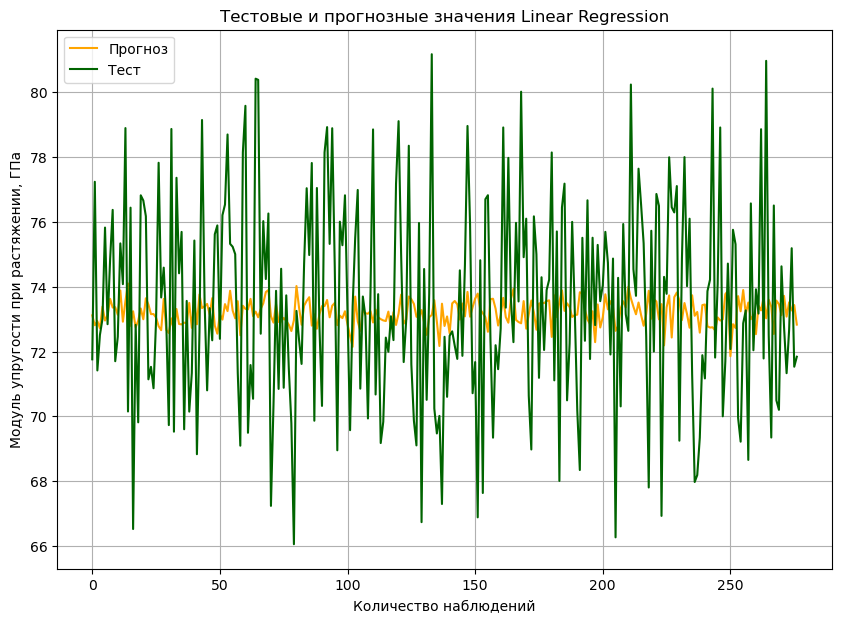

In [25]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr, label = "Прогноз", color = 'orange')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [26]:
#Метод градиентного бустинга - Gradient Boosting Regressor -4  
gbr =  GradientBoostingRegressor()
gbr.fit(x_train, np.ravel(y_train))
y_pred_gbr = gbr.predict(x_test)
mae_gbr = mean_absolute_error(y_pred_gbr, y_test)
mse_gbr_elast = mean_squared_error(y_test,y_pred_gbr)
R_Squared_gbr =r2_score(y_test, y_pred_gbr)
print('Gradient Boosting Regressor Results Train:')
print("Train score: {:.2f}".format(gbr.score(x_train, y_train))) # Скор для тренировочной выборки
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test, y_pred_gbr)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_gbr)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast)))
print ('R Squared =',r2_score(y_test, y_pred_gbr))
print("Test score: {:.2f}".format(gbr.score(x_test, y_test)))# Скор для тестовой выборки

Gradient Boosting Regressor Results Train:
Train score: 0.49
Gradient Boosting Regressor Results:
GBR_MAE:  3
GBR_MAPE: 0.04
GBR_MSE: 10.81
GBR_RMSE: 3.29
R Squared = -0.09050686279431308
Test score: -0.09


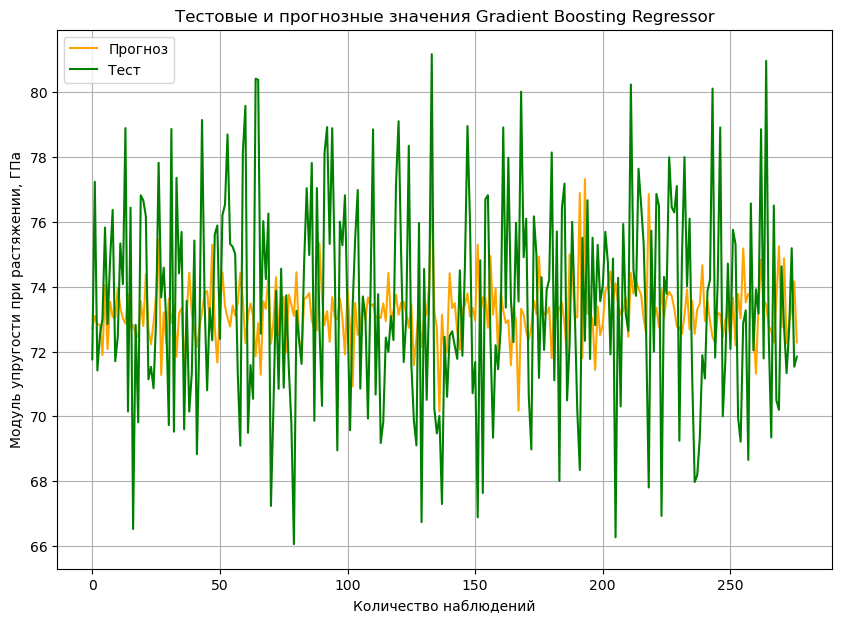

In [27]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr, label = "Прогноз", color = "orange")
plt.plot(y_test.values, label = "Тест", color = "green")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [28]:
# Метод К ближайших соседей - K Neighbors Regressor - 5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
mae_knn = mean_absolute_error(y_pred_knn, y_test)
mse_knn_elast = mean_squared_error(y_test,y_pred_knn)
R_Squared_knn =r2_score(y_test,y_pred_knn)
print('K Neighbors Regressor  Results Train:')
print("Test score: {:.2f}".format(knn.score(x_train, y_train)))# Скор для тренировочной выборки
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test, y_pred_knn)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_knn)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast)))
print ('R Squared =',r2_score(y_test,y_pred_knn))
print("Test score: {:.2f}".format(knn.score(x_test, y_test)))# Скор для тестовой выборки

K Neighbors Regressor  Results Train:
Test score: 0.18
K Neighbors Regressor  Results:
KNN_MAE:  3
KNN_MAPE: 0.04
KNN_MSE: 12.08
KNN_RMSE: 3.48
R Squared = -0.21912129727740592
Test score: -0.22


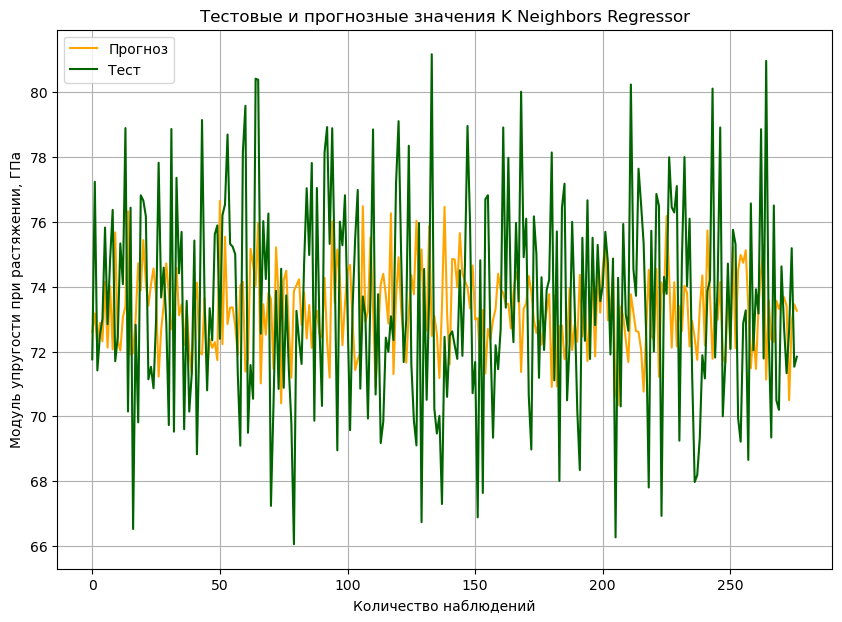

In [29]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn, label = "Прогноз", color = 'orange')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [30]:
#Деревья решений - Decision Tree Regressor - 6

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train.values)
y_pred_dtr = dtr.predict(x_test)
mae_dtr = mean_absolute_error(y_pred_dtr, y_test)
mse_dtr_elast = mean_squared_error(y_test,y_pred_dtr)
R_Squared_dtr =r2_score(y_test,y_pred_dtr)
print('Decision Tree Regressor Results Train:')
print("Train score: {:.2f}".format(dtr.score(x_train, y_train)))# Скор для тренировочной выборки
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test, y_pred_dtr)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_dtr)))
print ('R Squared =',r2_score(y_test,y_pred_dtr))
print("Test score: {:.2f}".format(dtr.score(x_test, y_test)))# Скор для тестовой выборки

Decision Tree Regressor Results Train:
Train score: 1.00
Decision Tree Regressor Results:
DTR_MAE:  4
DTR_MSE: 20.83
DTR_RMSE: 4.56
DTR_MAPE: 0.05
R Squared = -1.1015991039930357
Test score: -1.10


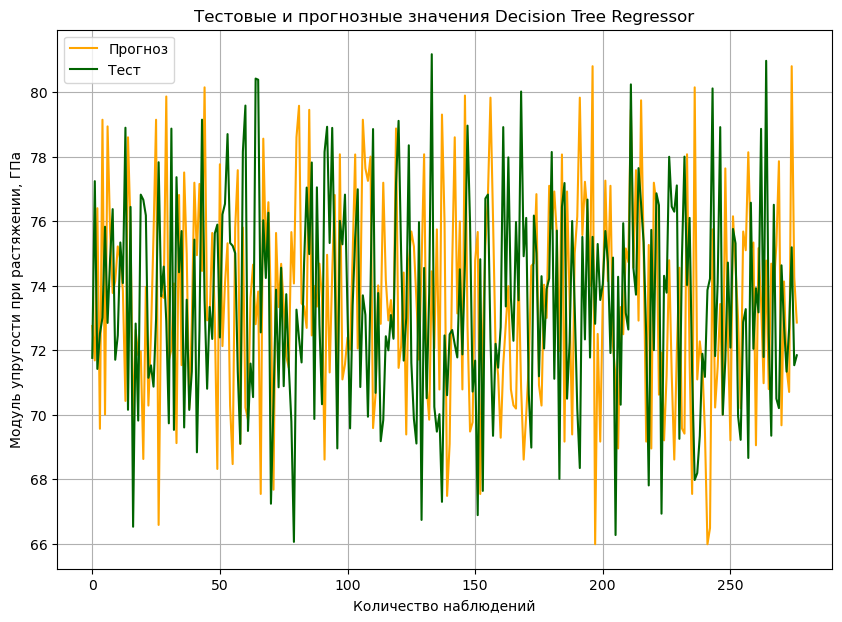

In [31]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr, label = "Прогноз", color = 'orange')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [32]:
# Стохастический градиентный спуск (SGD) - Stochastic Gradient Descent Regressor - 7 

sdg = SGDRegressor()
sdg.fit(x_train, y_train)
y_pred_sdg = sdg.predict(x_test)
mae_sdg = mean_absolute_error(y_pred_sdg, y_test)
mse_sdg_elast = mean_squared_error(y_test,y_pred_sdg)
R_Squared_sgd=r2_score(y_test,y_pred_sdg)
print('Stochastic Gradient Descent Regressor Results Train:')
print("Train score: {:.2f}".format(sdg.score(x_train, y_train)))# Скор для тренировочной выборки
print('Stochastic Gradient Descent Regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test, y_pred_sdg)))
print('SGD_MSE: {:.2f}'.format(mse_sdg_elast))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_sdg_elast)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_sdg)))
print ('R Squared =',r2_score(y_test,y_pred_sdg))
print("Test score: {:.2f}".format(sdg.score(x_test, y_test)))# Скор для тестовой выборки

Stochastic Gradient Descent Regressor Results Train:
Train score: -0.03
Stochastic Gradient Descent Regressor Results:
SGD_MAE:  3
SGD_MSE: 10.58
SGD_RMSE: 3.25
SGD_MAPE: 0.04
R Squared = -0.06803676095068312
Test score: -0.07


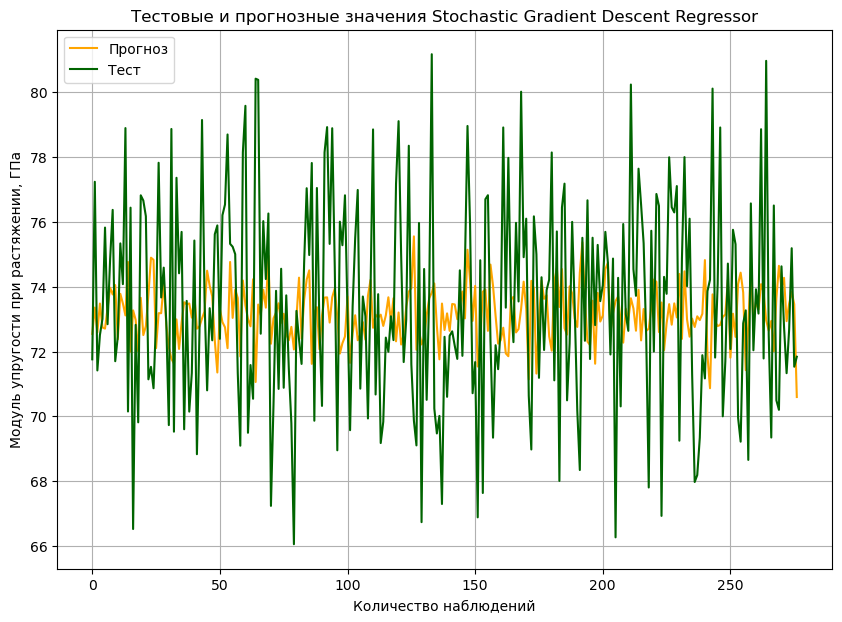

In [33]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Stochastic Gradient Descent Regressor")
plt.plot(y_pred_sdg, label = "Прогноз", color = 'orange')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [34]:
# Многослойный перцептрон - Multi-layer Perceptron regressor - 8

mlp = MLPRegressor(random_state = 1, max_iter = 500)
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)
mae_mlp = mean_absolute_error(y_pred_mlp, y_test)
mse_mlp_elast = mean_squared_error(y_test,y_pred_mlp)
R_Squared_mlp =r2_score(y_test,y_pred_mlp)
print('Multi-layer Perceptron regressor Results Train:')
print("Train score: {:.2f}".format(mlp.score(x_train, y_train)))# Скор для тренировочной выборки
print('Multi-layer Perceptron regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test, y_pred_mlp)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_mlp)))
print('SGD_MSE: {:.2f}'.format(mse_mlp_elast))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_mlp_elast)))
print ('R Squared =',r2_score(y_test,y_pred_mlp))
print("Test score: {:.2f}".format(mlp.score(x_test, y_test)))# Скор для тестовой выборки


Multi-layer Perceptron regressor Results Train:
Train score: -5.05
Multi-layer Perceptron regressor Results:
SGD_MAE:  6
SGD_MAPE: 0.08
SGD_MSE: 63.61
SGD_RMSE: 7.98
R Squared = -5.418359502680605
Test score: -5.42


C:\Users\55944\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


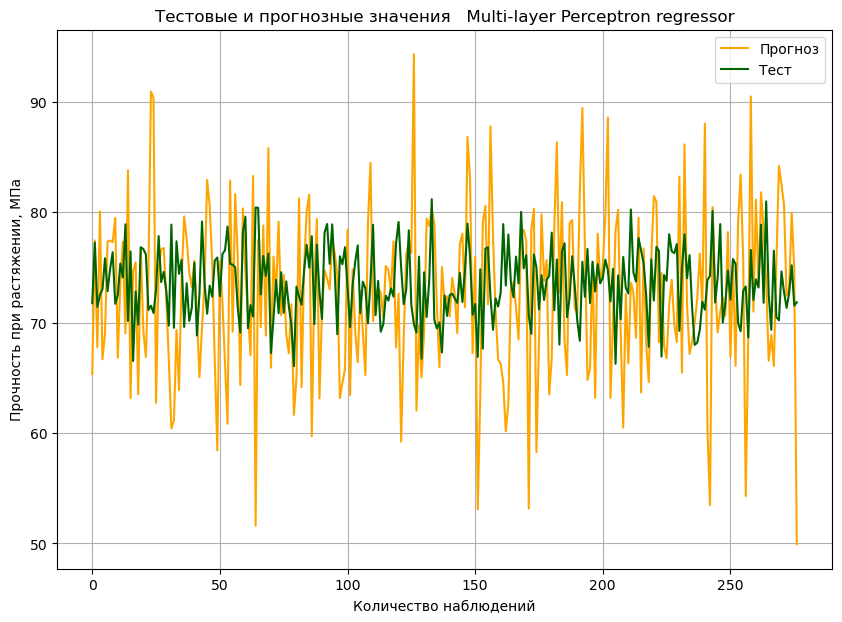

In [35]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения   Multi-layer Perceptron regressor")
plt.plot(y_pred_mlp, label = "Прогноз", color = 'orange')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

In [36]:
mae_df = {'Регрессор': ['Support Vector', 'RandomForest', 'Linear Regression', 'GradientBoosting', 'KNeighbors', 'DecisionTree', 'SGD', 'MLP', 'Lasso'], 'MAE': [mae_svr, mae_rfr, mae_lr, mae_gbr, mae_knn, mae_dtr, mae_sdg, mae_mlp, mae_lr]}
mae_df = pd.DataFrame(mae_df)

In [37]:
mae_df

,Регрессор,MAE
0,Support Vector,3.727572
1,RandomForest,2.644870
2,Linear Regression,2.612192
3,GradientBoosting,2.674502
4,KNeighbors,2.826817
5,DecisionTree,3.735693
6,SGD,2.626289
7,MLP,6.232430
8,Lasso,2.612192


In [40]:
R_Squared_df = {'Регрессор': ['Support Vector', 'RandomForest', 'Linear Regression', 'GradientBoosting', 'KNeighbors', 'DecisionTree', 'SGD', 'MLP', ], 'R_Squared': [R_Squared_svr,R_Squared_rfr, R_Squared_lr, R_Squared_gbr, R_Squared_knn,R_Squared_dtr, R_Squared_sgd, R_Squared_mlp, ]}
R_Squared_df = pd.DataFrame(R_Squared_df)

In [41]:
R_Squared_df

,Регрессор,R_Squared
0,Support Vector,-1.065531
1,RandomForest,-0.059768
2,Linear Regression,-0.026243
3,GradientBoosting,-0.090507
4,KNeighbors,-0.219121
5,DecisionTree,-1.101599
6,SGD,-0.068037
7,MLP,-5.418360
